# Question 2

In [3]:
# -*- coding: utf-8 -*-
"""
"""
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.close("all")

def derivative_descent(x_ini, f, der_f, step, eps=0.01):
    x_i = x_ini
    der_f_at_x = der_f(x_i)
    path = [x_i]
    while np.abs(der_f_at_x) > eps:
        x_i = x_i - step*der_f(x_i)
        path.append(x_i)
        der_f_at_x = der_f(x_i)
    return np.array(path)

def newton_method(x_ini, f, der_f, der2_f, eps=0.01):
    x_i = x_ini
    der_f_at_x = der_f(x_i)
    path = [x_i]
    while np.abs(der_f_at_x) > eps:
        x_i = x_i - der_f(x_i)/der2_f(x_i)
        path.append(x_i)
        der_f_at_x = der_f(x_i)
    return np.array(path)
    
def quadratic_approx(x, point, f, df, d2f):
    approx = f(point) + df(point)*(x-point)\
    + 1.0/2.0 * d2f(point)*(x-point)**2.0
    return approx

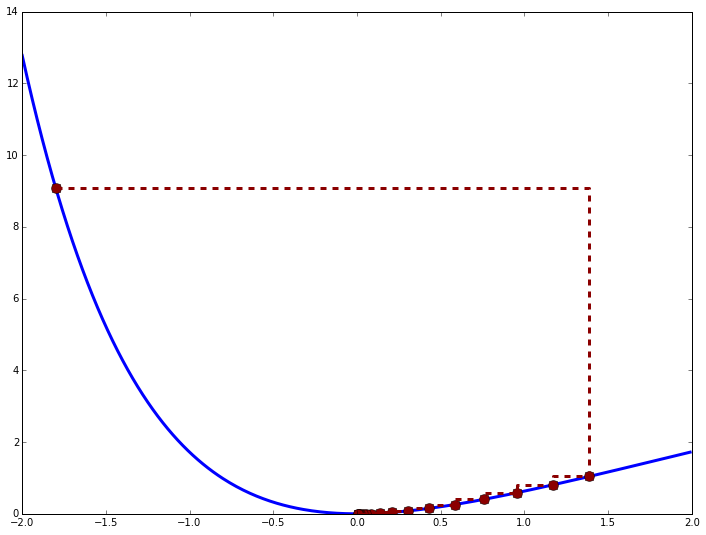

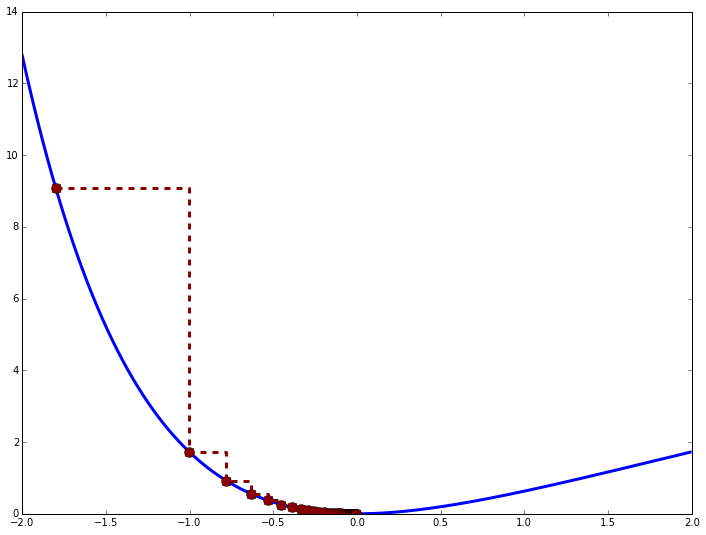

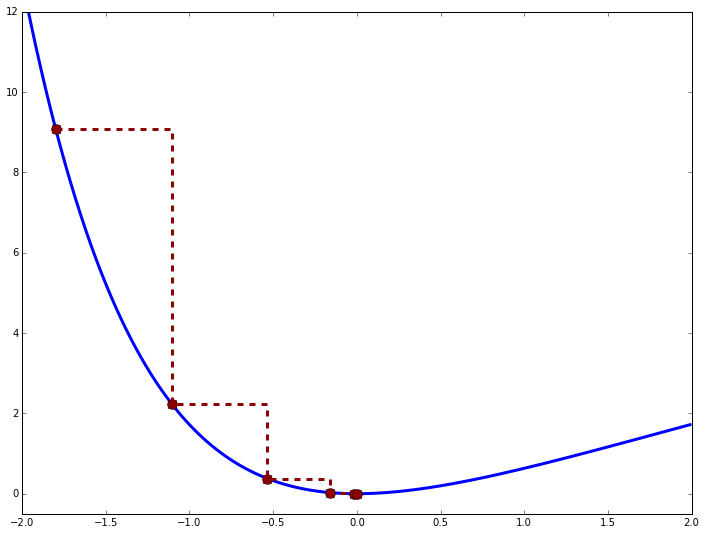

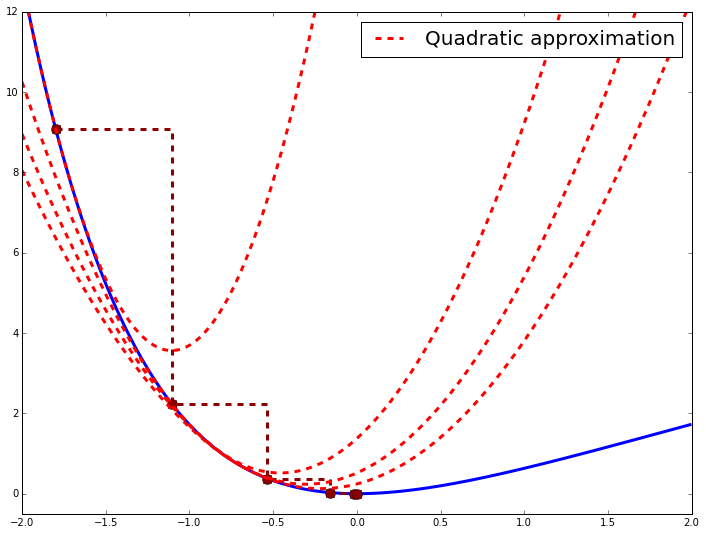

In [4]:
def trajectory(x,f):
    n = len(x)
    res = np.zeros((2, n*2 - 1))
    for i in range(n-1):
        res[0, 2*i] = x[i]
        res[0, 2*i+1] = x[i+1]
        res[1, 2*i:(2*i+2)] = f(x[i])
    res[0,2*n-2] = x[-1]
    res[1,2*n-2] = f(x[-1])
    return res
    
x_min = -2.
x_max = 2.
x = np.arange(x_min,x_max,1e-2)
f =lambda y: (1-np.exp(-y)) * y 
df =lambda y: (1-np.exp(-y)) + y * np.exp(-y)
d2f =lambda y: (2 -y) * np.exp(-y)

step = 0.2
x_ini = -1.8
sol_der_desc = derivative_descent(x_ini, f, df, step)
plt.figure(figsize=(12, 9))  
plt.plot(x,f(x),lw=3)
traj = trajectory(sol_der_desc,f)
plt.plot(sol_der_desc, f(sol_der_desc), 'o', c="darkred",lw=3, markersize=10)
plt.plot(traj[0,:],traj[1,:],'--',c='darkred',lw=3)

step = 0.05
x_ini = -1.8
sol_der_desc = derivative_descent(x_ini, f, df, step)
plt.figure(figsize=(12, 9))  
plt.plot(x,f(x),lw=3)
traj = trajectory(sol_der_desc,f)
plt.plot(sol_der_desc, f(sol_der_desc), 'o', c="darkred",lw=3, markersize=10)
plt.plot(traj[0,:],traj[1,:],'--',c='darkred',lw=3)

newton_sol = newton_method(x_ini, f, df, d2f)
plt.figure(figsize=(12, 9))  
plt.plot(x,f(x),lw=3)
traj = trajectory(newton_sol,f)
plt.plot(newton_sol, f(newton_sol), 'o', c="darkred",lw=3, markersize=10)
plt.plot(traj[0,:],traj[1,:],'--',c='darkred',lw=3)
plt.ylim([-0.5,12])

plt.figure(figsize=(12, 9))  
plt.plot(x,f(x),lw=3)
traj = trajectory(newton_sol,f)
plt.plot(newton_sol, f(newton_sol), 'o', c="darkred",lw=3, markersize=10)
plt.plot(traj[0,:],traj[1,:],'--',c='darkred',lw=3)
plt.ylim([-0.5,12])
plt.plot(x,quadratic_approx(x, sol_der_desc[0], f, df, d2f), "--",c="red",lw=3,label="Quadratic approximation")
for i in range(1,4):
    plt.plot(x,quadratic_approx(x, sol_der_desc[i], f, df, d2f), "--",c="red",lw=3)
plt.ylim([-0.5,12])
plt.legend(fontsize=20,loc="upper right")

# Question 3

In [5]:
# -*- coding: utf-8 -*-
"""
"""
import os.path
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import axes3d
import numpy as np
plt.close("all")


def projected_gradient_descent(x_ini,f,grad,step,eps,proj,n_iter):
    x_i = proj(x_ini)
    path = [x_i]
    grad_at_x = grad(x_i)
    iterations = 1
    while np.sqrt(np.dot(grad_at_x, grad_at_x)) > eps\
    and iterations <= n_iter:
        x_i = x_i - step*grad(x_i)
        x_i = proj(x_i)
        path.append(x_i)
        grad_at_x = grad(x_i)
        iterations +=1
    return np.array(path)

def projection_positive(x):
    func = lambda x_i: (0 if x_i<0 else x_i)
    v_func = np.vectorize(func)
    proj = v_func(x)
    return proj

def projection_l2(x):
    if np.linalg.norm(x)<=1:
        return x
    else:
        return x/(np.linalg.norm(x))

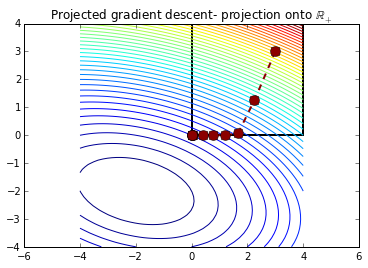

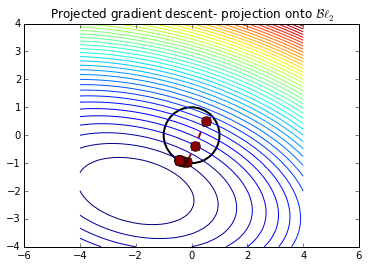

In [7]:
A = np.array([[1.,0.5],[0.5,3.]])/10.
c = np.array([-2.,-2.])
def quad(A, x):
    return A[0,0]*((x[0]-c[0]) ** 2)/2 + A[0,1]*((x[0]-c[0]) *(x[1]-c[1])) + A[1,1]*((x[1]-c[1]) ** 2)/2
    
def quad_grad(A, x):
    return np.dot(A,x-c)
    
f =lambda y: quad(A,y)
df =lambda y: quad_grad(A,y)
d2f =lambda y: A

eps = 1e-2
xmesh, ymesh = np.mgrid[-4:4:50j,-4:4:50j]
fmesh_pos = quad(A, np.array([xmesh, ymesh]))

step = 1
n_iter= 10
x_ini = np.array([3.,3.])
sol_grad_proj_pos = projected_gradient_descent(x_ini, f, df, step, eps,projection_positive, n_iter)
x_ini = np.array([0.5,0.5])
sol_grad_l2 = projected_gradient_descent(x_ini, f, df, step, eps, projection_l2, n_iter)

plt.figure()
ax = plt.axes()
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh_pos, 50)
plt.plot(sol_grad_proj_pos[:,0], sol_grad_proj_pos[:,1], "--o",c='darkred', lw=2,markersize=10)
rect = patches.Rectangle((0,0), width=4, height=4, lw=2, fill=False)
ax.add_patch(rect)
ax.set_title(r'Projected gradient descent- projection onto $\mathbb{R}_+$')
plt.savefig('Q3Ci.png')

plt.figure()
ax = plt.axes()
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh_pos, 50)
plt.plot(sol_grad_l2[:,0], sol_grad_l2[:,1], "--o",c='darkred', lw=2,markersize=10)
circ = patches.Circle((0,0), radius=1, lw=2, fill=False)
ax.add_patch(circ)
ax.set_title(r'Projected gradient descent- projection onto $\mathcal{B}{\ell_2}$')
plt.savefig('Q3Cii.png')